In [5]:
import pandas as pd

In [ ]:
# Loading dataset

In [40]:
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
# Load dataset-2

In [41]:
df = pd.read_csv('heart-2.csv')
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   60    1   3     145   233    1        0       150     0      2.3    0   
1   35    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   55    1   1     120   236    0        1       178     0      0.8    2   
4   56    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       

In [ ]:
# Load dataset-3

In [61]:
df = pd.read_csv('heart-3.csv')
print(df.head())
print(df.info())
print(df.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [8]:
# Data pre-processing

In [62]:
# Checking for missing values
print(df.isnull().sum())
# drop rows with missing values
df = df.dropna()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [63]:
# If dataset contains categorical columns, encoding them
df = pd.get_dummies(df, drop_first=True)

In [16]:
# Feature and target split

In [47]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# For dataset-2

In [33]:
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
# For dataset-3

In [65]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [19]:
# Train-Test split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train and compare Logistic Regression, RF, Support Vector Machine(SVC)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
# Function for model evaluation

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

def evaluate_models(models_dict, X_train, y_train, X_test, y_test):
    """
    Train and evaluate classification models.

    Args:
        models_dict (dict): Dictionary with model name as key and model instance as value.
        X_train (DataFrame or np.array): Training features.
        y_train (Series or np.array): Training labels.
        X_test (DataFrame or np.array): Test features.
        y_test (Series or np.array): Test labels.

    Returns:
        dict: Dictionary with model names as keys and dict of metrics as values.
    """
    results = {}
    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Predict probabilities for positive class if possible
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            # Some classifiers like SVM have decision_function but no predict_proba
            y_proba = model.decision_function(X_test)
        else:
            y_proba = None
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
        
        results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}
    
    # Display results
    for model_name, metrics in results.items():
        print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']}")
    
    return results


In [16]:
# Default model evaluation

In [17]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}


heart.csv:
Samples: 1025, Features: 14, Missing Values: 0
Target Distribution:
target
1    526
0    499
Name: count, dtype: int64


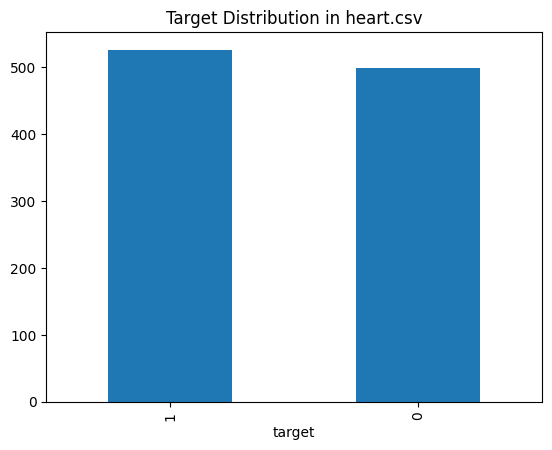


heart-2.csv:
Samples: 289, Features: 14, Missing Values: 0
Target Distribution:
output
1    165
0    124
Name: count, dtype: int64


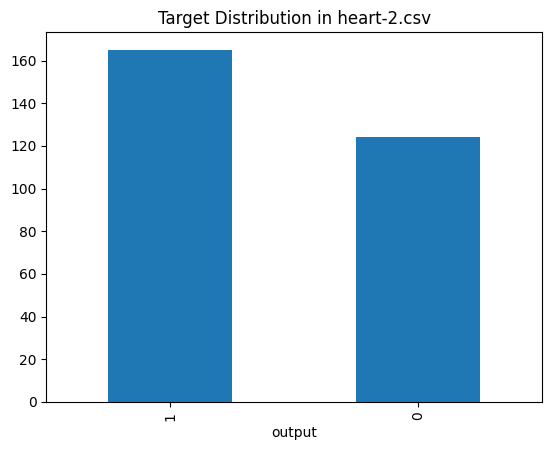


heart-3.csv:
Samples: 918, Features: 12, Missing Values: 0
Target Distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


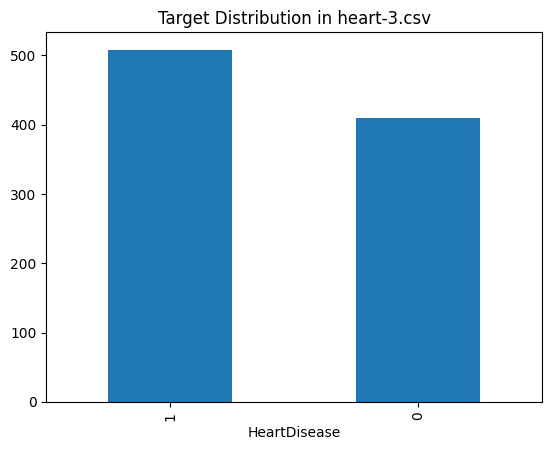

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset file paths
files = ['heart.csv', 'heart-2.csv', 'heart-3.csv']
targets = ['target', 'output', 'HeartDisease']

summary = []
for file, target in zip(files, targets):
    df = pd.read_csv(file)
    n_samples, n_features = df.shape
    missing = df.isnull().sum().sum()
    target_counts = df[target].value_counts()
    summary.append({
        'Dataset': file,
        'Samples': n_samples,
        'Features': n_features,
        'Missing Values': missing,
        'Target Distribution': target_counts.to_dict()
    })
    print(f"\n{file}:")
    print(f"Samples: {n_samples}, Features: {n_features}, Missing Values: {missing}")
    print(f"Target Distribution:\n{target_counts}")
    # Plot target distribution
    target_counts.plot(kind='bar', title=f'Target Distribution in {file}')
    plt.show()


## Dataset Comparison

We will compare the three available heart disease datasets (`heart.csv`, `heart-2.csv`, `heart-3.csv`) using key metrics:

- Number of samples and features
- Missing values
- Target variable distribution
- Model performance (Accuracy, ROC AUC)

This will help us select the most suitable dataset for further analysis.

In [19]:
from sklearn.model_selection import train_test_split

# Use the models and evaluation function already defined
# models: dict of model instances
# evaluate_models: function

dataset_files = ['heart.csv', 'heart-2.csv', 'heart-3.csv']
target_columns = ['target', 'output', 'HeartDisease']

performance_summary = {}
for file, target in zip(dataset_files, target_columns):
    print(f"\nEvaluating models for {file}:")
    df = pd.read_csv(file)
    df = df.dropna()
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = evaluate_models(models, X_train, y_train, X_test, y_test)
    performance_summary[file] = results



Evaluating models for heart.csv:
Logistic Regression: Accuracy = 0.7951, ROC AUC = 0.8770226537216829
Random Forest: Accuracy = 0.9854, ROC AUC = 0.9995716733295259
SVM: Accuracy = 0.6829, ROC AUC = 0.7066914144298496
XGBoost: Accuracy = 0.9854, ROC AUC = 0.9894346087949742
KNN: Accuracy = 0.7317, ROC AUC = 0.8604606891300209
Naive Bayes: Accuracy = 0.8000, ROC AUC = 0.8705501618122977

Evaluating models for heart-2.csv:
Logistic Regression: Accuracy = 0.7951, ROC AUC = 0.8770226537216829
Random Forest: Accuracy = 0.9854, ROC AUC = 0.9995716733295259
SVM: Accuracy = 0.6829, ROC AUC = 0.7066914144298496
XGBoost: Accuracy = 0.9854, ROC AUC = 0.9894346087949742
KNN: Accuracy = 0.7317, ROC AUC = 0.8604606891300209
Naive Bayes: Accuracy = 0.8000, ROC AUC = 0.8705501618122977

Evaluating models for heart-2.csv:
Logistic Regression: Accuracy = 0.8621, ROC AUC = 0.94026284348865
Random Forest: Accuracy = 0.8621, ROC AUC = 0.900836320191159
SVM: Accuracy = 0.6552, ROC AUC = 0.8040621266427719


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.8533, ROC AUC = 0.9237771574220172
Random Forest: Accuracy = 0.8696, ROC AUC = 0.9337905085568637
SVM: Accuracy = 0.6848, ROC AUC = 0.7511833960432092
XGBoost: Accuracy = 0.8696, ROC AUC = 0.9211069304527248
KNN: Accuracy = 0.7065, ROC AUC = 0.7334627988833596
Naive Bayes: Accuracy = 0.8587, ROC AUC = 0.9302099769389489


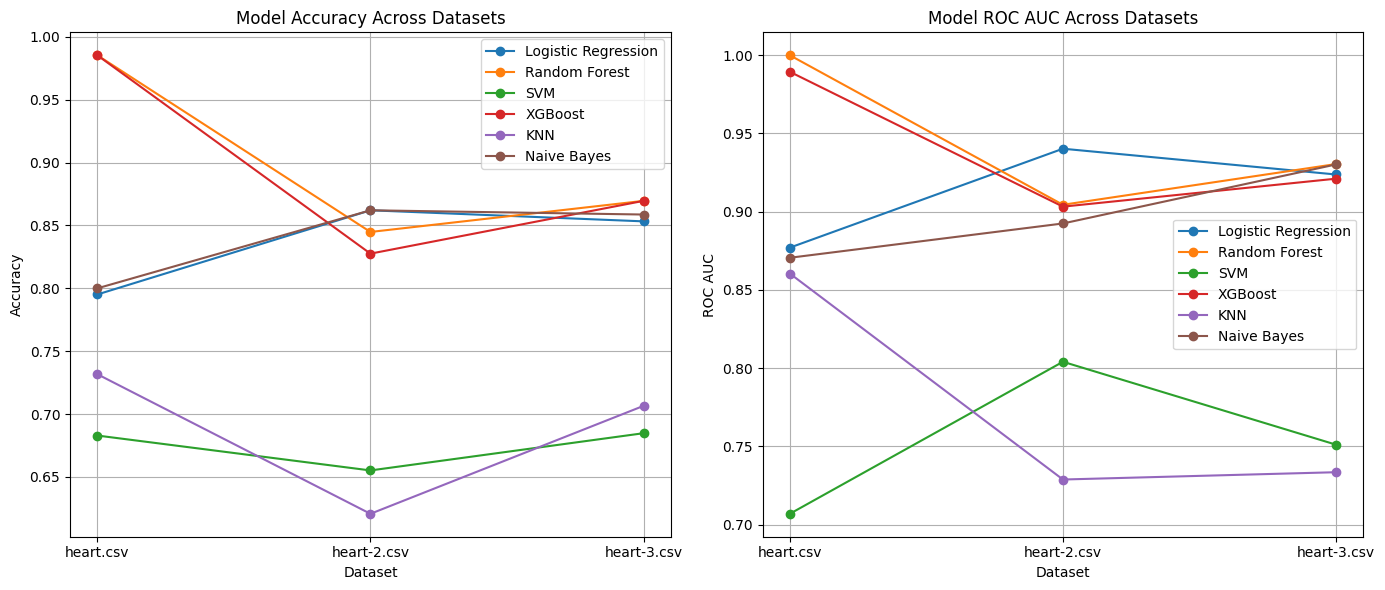

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
# performance_summary should be available from previous cell

models_list = list(models.keys())
datasets_list = ['heart.csv', 'heart-2.csv', 'heart-3.csv']

# Accuracy and ROC AUC matrices
accuracy_matrix = np.zeros((len(models_list), len(datasets_list)))
rocauc_matrix = np.zeros((len(models_list), len(datasets_list)))

for j, dataset in enumerate(datasets_list):
    for i, model in enumerate(models_list):
        acc = performance_summary[dataset][model]['Accuracy']
        roc = performance_summary[dataset][model]['ROC AUC']
        accuracy_matrix[i, j] = acc
        # Handle case where ROC AUC is 'N/A'
        try:
            rocauc_matrix[i, j] = float(roc)
        except:
            rocauc_matrix[i, j] = np.nan

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
for i, model in enumerate(models_list):
    axes[0].plot(datasets_list, accuracy_matrix[i], marker='o', label=model)
axes[0].set_title('Model Accuracy Across Datasets')
axes[0].set_xlabel('Dataset')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# ROC AUC plot
for i, model in enumerate(models_list):
    axes[1].plot(datasets_list, rocauc_matrix[i], marker='o', label=model)
axes[1].set_title('Model ROC AUC Across Datasets')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('ROC AUC')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

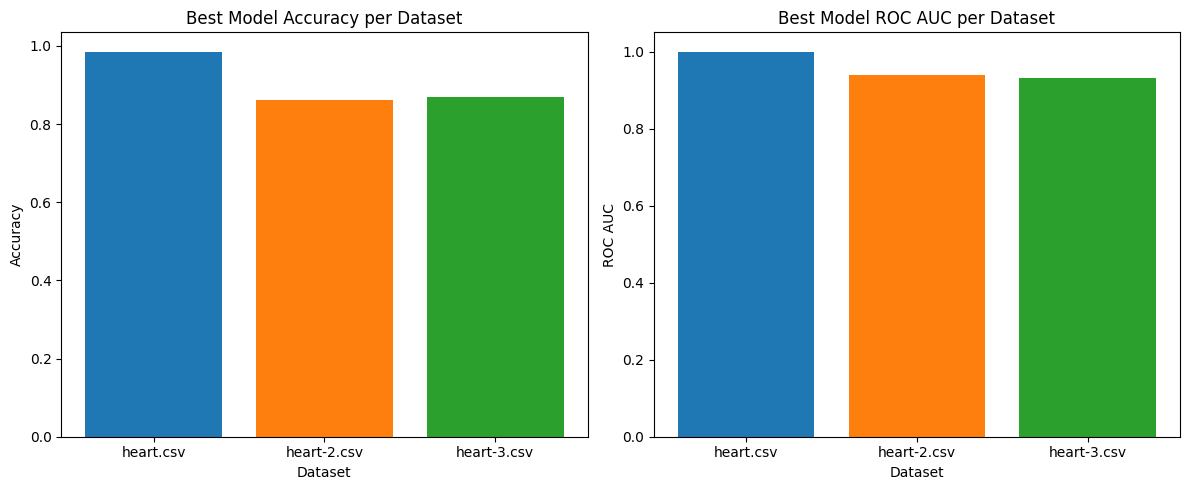

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Find best accuracy and ROC AUC for each dataset
best_accuracy = []
best_rocauc = []
datasets_list = ['heart.csv', 'heart-2.csv', 'heart-3.csv']
for dataset in datasets_list:
    accs = [performance_summary[dataset][model]['Accuracy'] for model in performance_summary[dataset]]
    rocs = []
    for model in performance_summary[dataset]:
        roc = performance_summary[dataset][model]['ROC AUC']
        try:
            rocs.append(float(roc))
        except:
            rocs.append(np.nan)
    best_accuracy.append(np.max(accs))
    best_rocauc.append(np.nanmax(rocs))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Best Accuracy per dataset
ax[0].bar(datasets_list, best_accuracy, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[0].set_title('Best Model Accuracy per Dataset')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Accuracy')

# Best ROC AUC per dataset
ax[1].bar(datasets_list, best_rocauc, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax[1].set_title('Best Model ROC AUC per Dataset')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('ROC AUC')

plt.tight_layout()
plt.show()


Feature Importance for heart.csv:


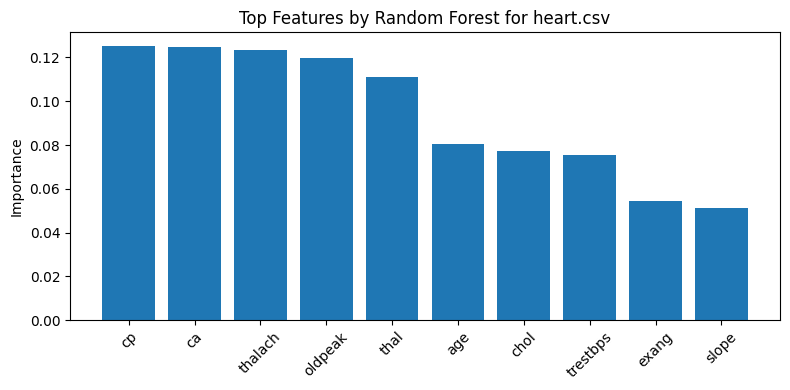

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


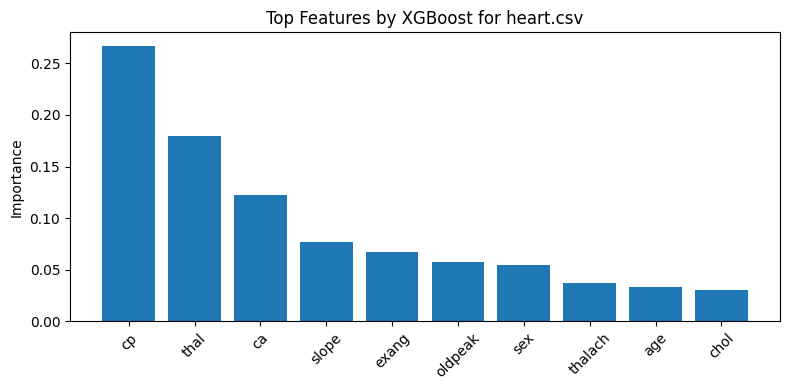

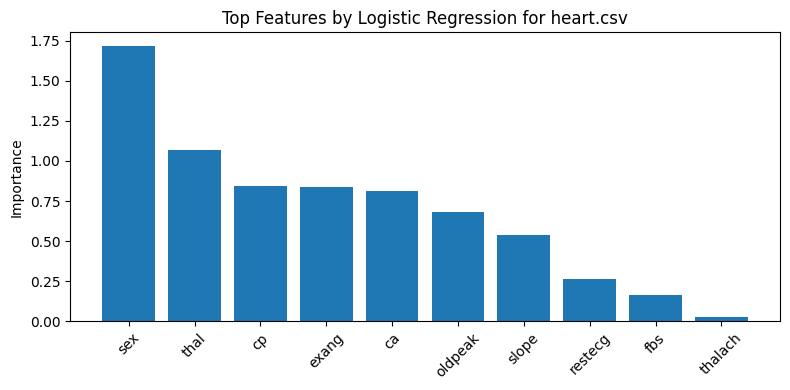


Feature Importance for heart-2.csv:


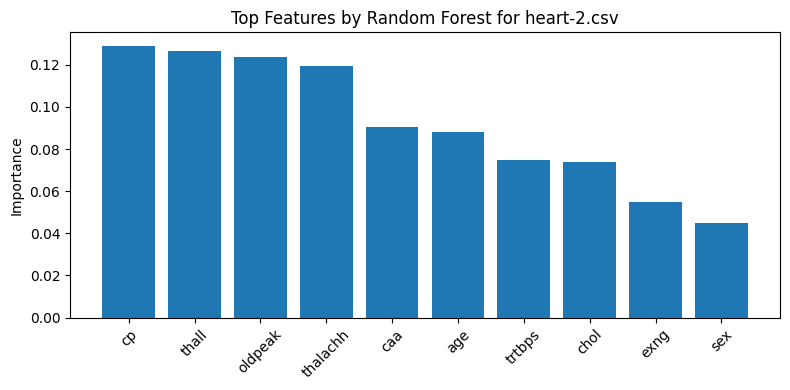

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


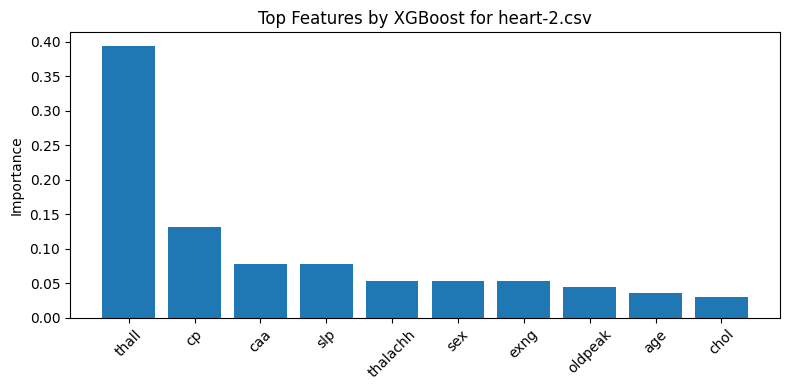

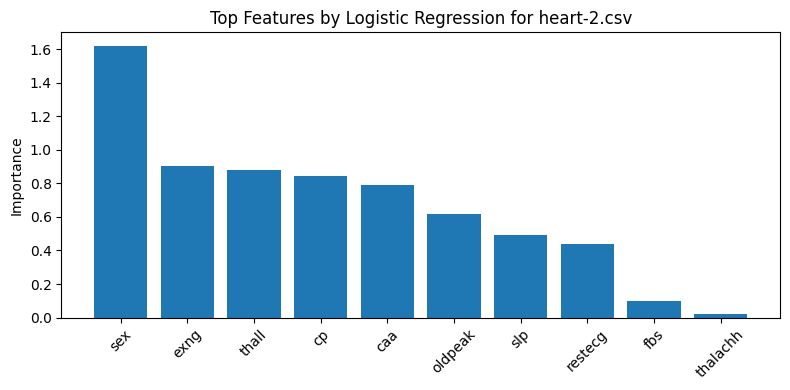


Feature Importance for heart-3.csv:


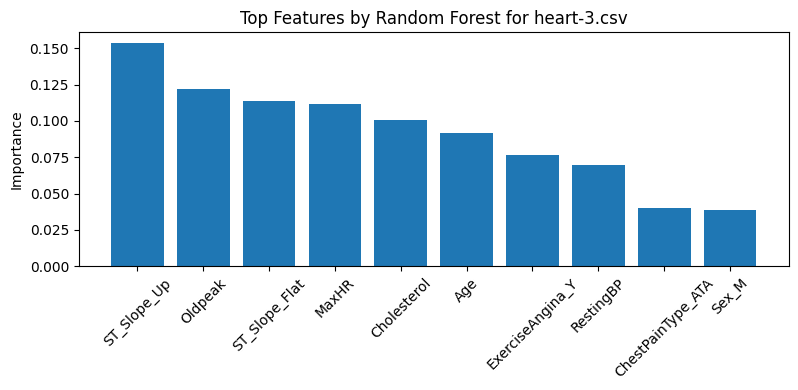

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


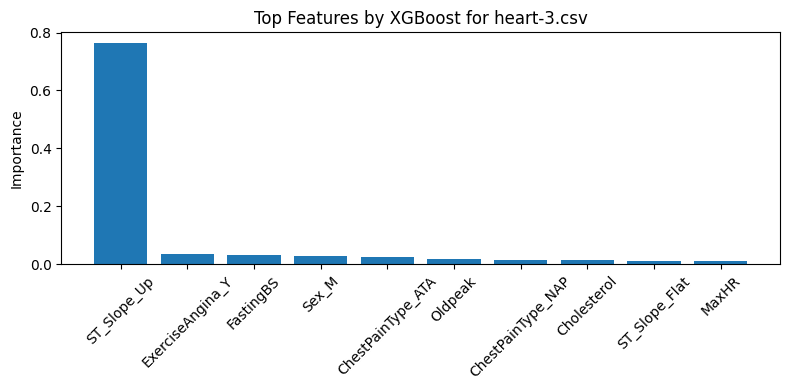

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


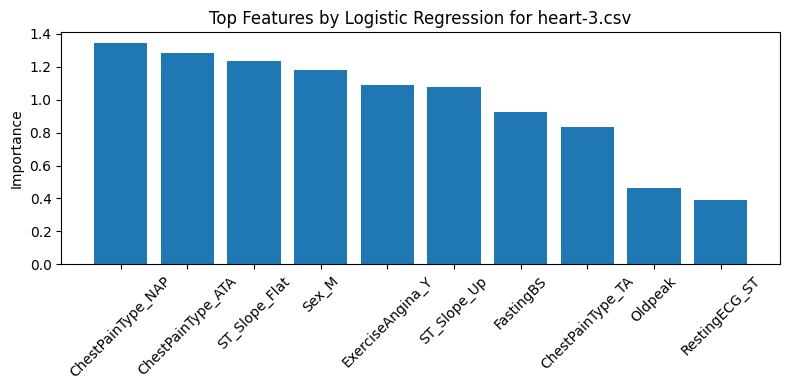

In [20]:
importances_summary = {}
from sklearn.inspection import permutation_importance

# Models that support feature importance directly
importance_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

datasets_list = ['heart.csv', 'heart-2.csv', 'heart-3.csv']
target_columns = ['target', 'output', 'HeartDisease']

for file, target in zip(datasets_list, target_columns):
    print(f"\nFeature Importance for {file}:")
    df = pd.read_csv(file)
    df = df.dropna()
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    importances_summary[file] = {}
    for model_name, model in importance_models.items():
        model.fit(X_train, y_train)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = abs(model.coef_[0])
        else:
            # fallback to permutation importance
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            importances = result.importances_mean
        # Sort and plot
        indices = importances.argsort()[::-1]
        top_features = X.columns[indices][:10]
        top_importances = importances[indices][:10]
        importances_summary[file][model_name] = dict(zip(top_features, top_importances))
        plt.figure(figsize=(8, 4))
        plt.bar(top_features, top_importances)
        plt.title(f"Top Features by {model_name} for {file}")
        plt.xticks(rotation=45)
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()


In [23]:
def predict_heart_disease_rf(user_data):
    """
    Predict heart disease risk and probability using Random Forest trained on heart.csv.
    Args:
        user_data (dict): Dictionary of user features matching heart.csv columns.
    Returns:
        tuple: (prediction_label, risk_score)
    """
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    # Load and preprocess heart.csv
    df = pd.read_csv('heart.csv').dropna()
    df = pd.get_dummies(df, drop_first=True)
    X = df.drop('target', axis=1)
    y = df['target']
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    # Prepare user input
    user_df = pd.DataFrame([user_data])
    user_df = pd.get_dummies(user_df, drop_first=True)
    user_df = user_df.reindex(columns=X.columns, fill_value=0)
    # Predict
    prediction = rf.predict(user_df)[0]
    risk_score = rf.predict_proba(user_df)[0][1]
    label = "Heart Disease" if prediction == 1 else "No Heart Disease"
    return label, risk_score

# Example usage:
example_user = {
    'age': 85,
    'sex': 1,
    'cp': 0,
    'trestbps': 140,
    'chol': 150,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 2.3,
    'slope': 2,
    'ca': 0,
    'thal': 2
}
label, risk = predict_heart_disease_rf(example_user)
print(f'Prediction: {label}')
print(f'Risk Score (Probability): {risk:.2f}')

Prediction: Heart Disease
Risk Score (Probability): 0.80
